In [1]:
import sys
from os.path import expanduser

# Add path to folder containing safepy
sys.path.append(expanduser('~') + '/Lab/Utils/Python/Networks/safepy/')

import safe

%matplotlib inline

# Annotating your own network with Gene Ontology

In [2]:
sf = safe.SAFE()

### Load and display the network

In [3]:
# Option 1: Tab-delimited 3-column format (node1 label - node2 label - edge weight). 
# The node labels will be used as keys to map nodes to attributes and therefore have to match the node identifiers in the attribute file.

# sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_3col.txt')

In [3]:
# Option 2: Tab-delimited 5-column format (node1 label - node1 key - node2 label - node2 key - edge weight).
# Here, the node keys (e.g., systematic gene names) are provided in addition to the node labels (e.g., common gene names).

sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_5col.txt')

Loading network from /Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_5col.txt
Applying the spring-embedded network layout... (may take several minutes)
Calculating edge lengths...


In [5]:
# # Option 3: Cytoscape session file (CYS)
# sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2016.cys',
#                node_key_attribute='ORF')

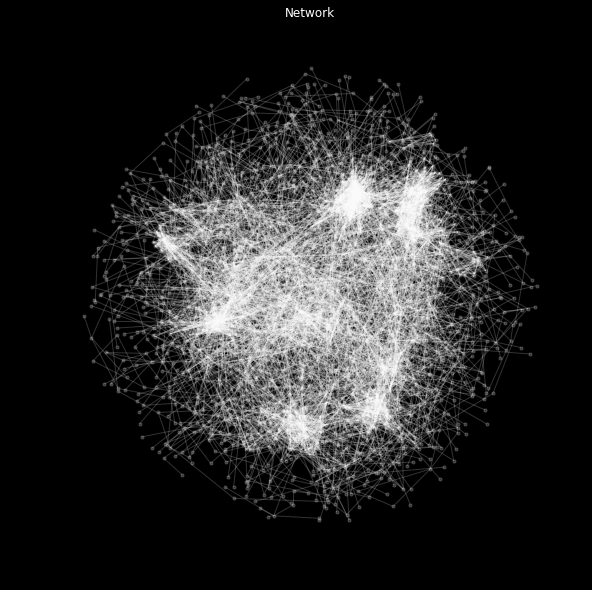

In [4]:
sf.plot_network()

### Load the attributes

The row labels in the attribute file should be matching the node keys in the network.

In [5]:
sf.load_attributes(attribute_file='/Users/abaryshnikova/Lab/Datasets/safe-data/attributes/go_bp_140819.txt.gz')

Loading attributes from /Users/abaryshnikova/Lab/Datasets/safe-data/attributes/go_bp_140819.txt.gz

Attribute data provided: 5911 labels x 4373 attributes
YAL001C, YAL003W, YAL005C and 3329 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 2579 labels x 4373 attributes
Values: 979552 NaNs
Values: 11318109 zeros
Values: 112913 positives
Values: 0 negatives


### Define the local neighborhoods and compute their enrichment for each attribute

In [6]:
# Explicitly define the node_distance metric and the neighborhood radius
sf.define_neighborhoods(node_distance_metric='shortpath_weighted_layout', neighborhood_radius=0.15)

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.15 x diameter
Number of nodes per neighborhood (mean +/- std): 28.16 +/- 44.62


In [7]:
sf.compute_pvalues(multiple_testing=True)

Using the hypergeometric test to calculate enrichment...
Overwriting global settings:
	multiple_testing=True
Running FDR-adjustment of p-values...


### Plot the enrichment landscapes of a sample of attributes

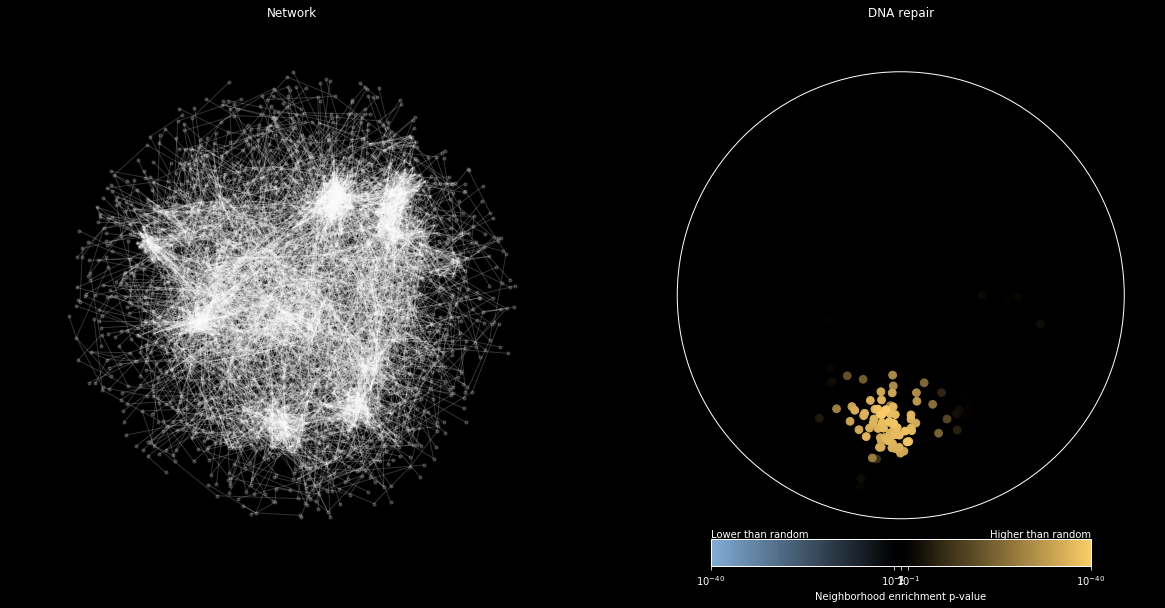

In [13]:
# Just the enrichment itself with min and max boundaries on the colormap
sf.plot_sample_attributes(attributes=['DNA repair'])

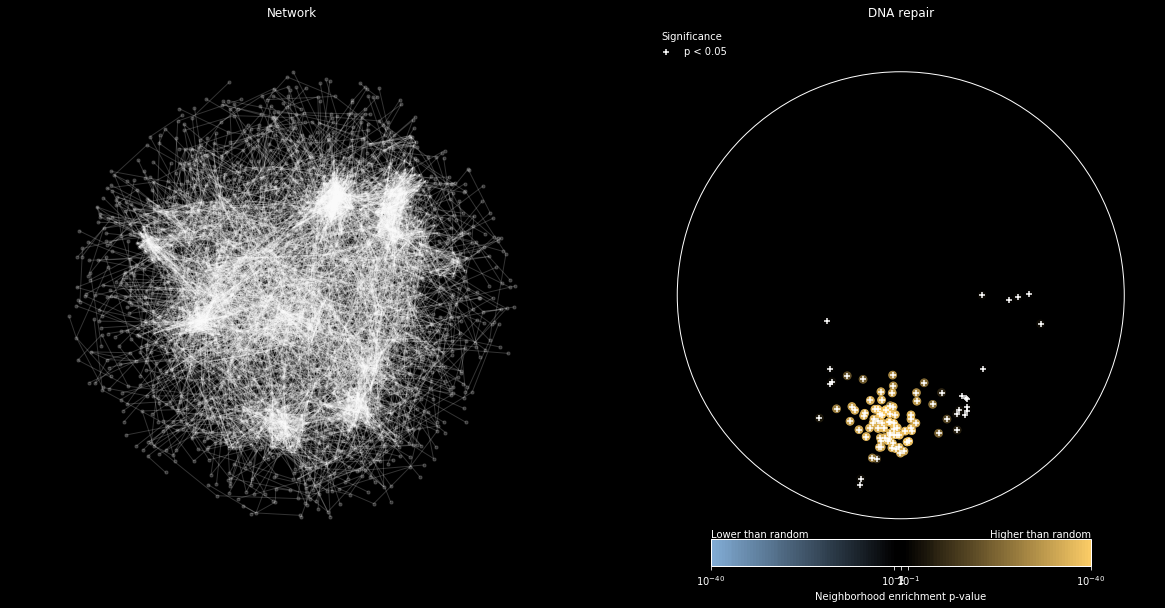

In [11]:
# Show the neighborhoods that are significant (p < 0.05)
sf.plot_sample_attributes(attributes=['DNA repair'], show_significant_nodes=True)

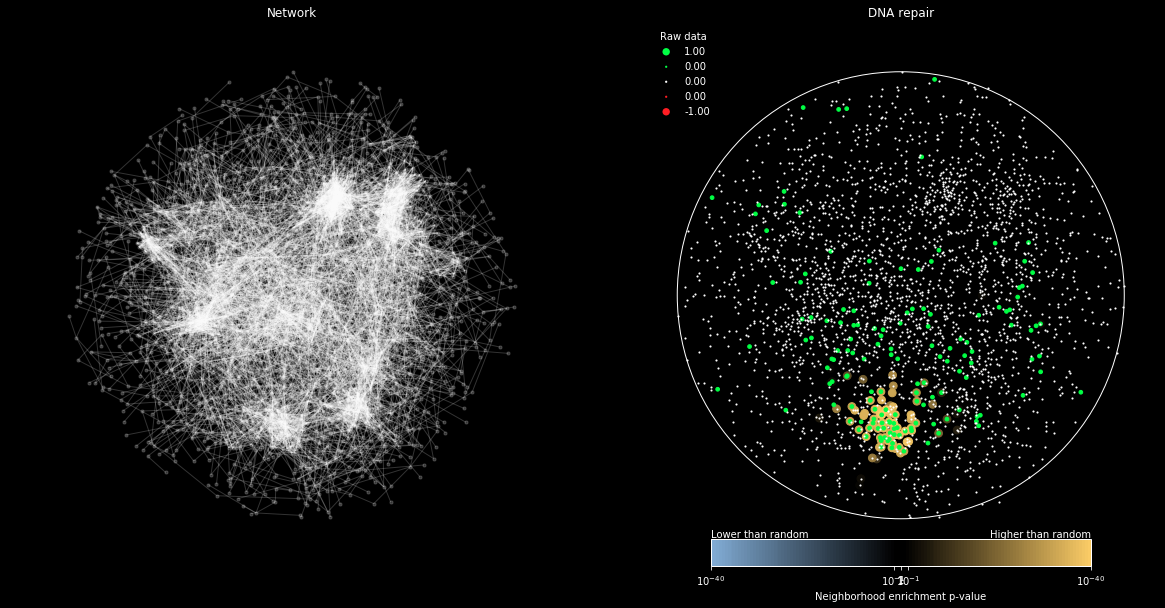

In [12]:
# Show the raw data (nodes annotated to this attribute)
sf.plot_sample_attributes(attributes=['DNA repair'], show_raw_data=True)

### Combine the enrichment landscapes into a single composite map

In [14]:
sf.define_top_attributes()

Criteria for top attributes:
- minimum number of enriched neighborhoods: 10
- region-specific distribution of enriched neighborhoods as defined by: connectivity
Number of top attributes: 1038


In [15]:
sf.define_domains(attribute_distance_threshold = 0.65)

Number of domains: 86 (containing 1-113 attributes)


In [16]:
sf.trim_domains()

Removed 66 domains because they were the top choice for less than 10 neighborhoods.


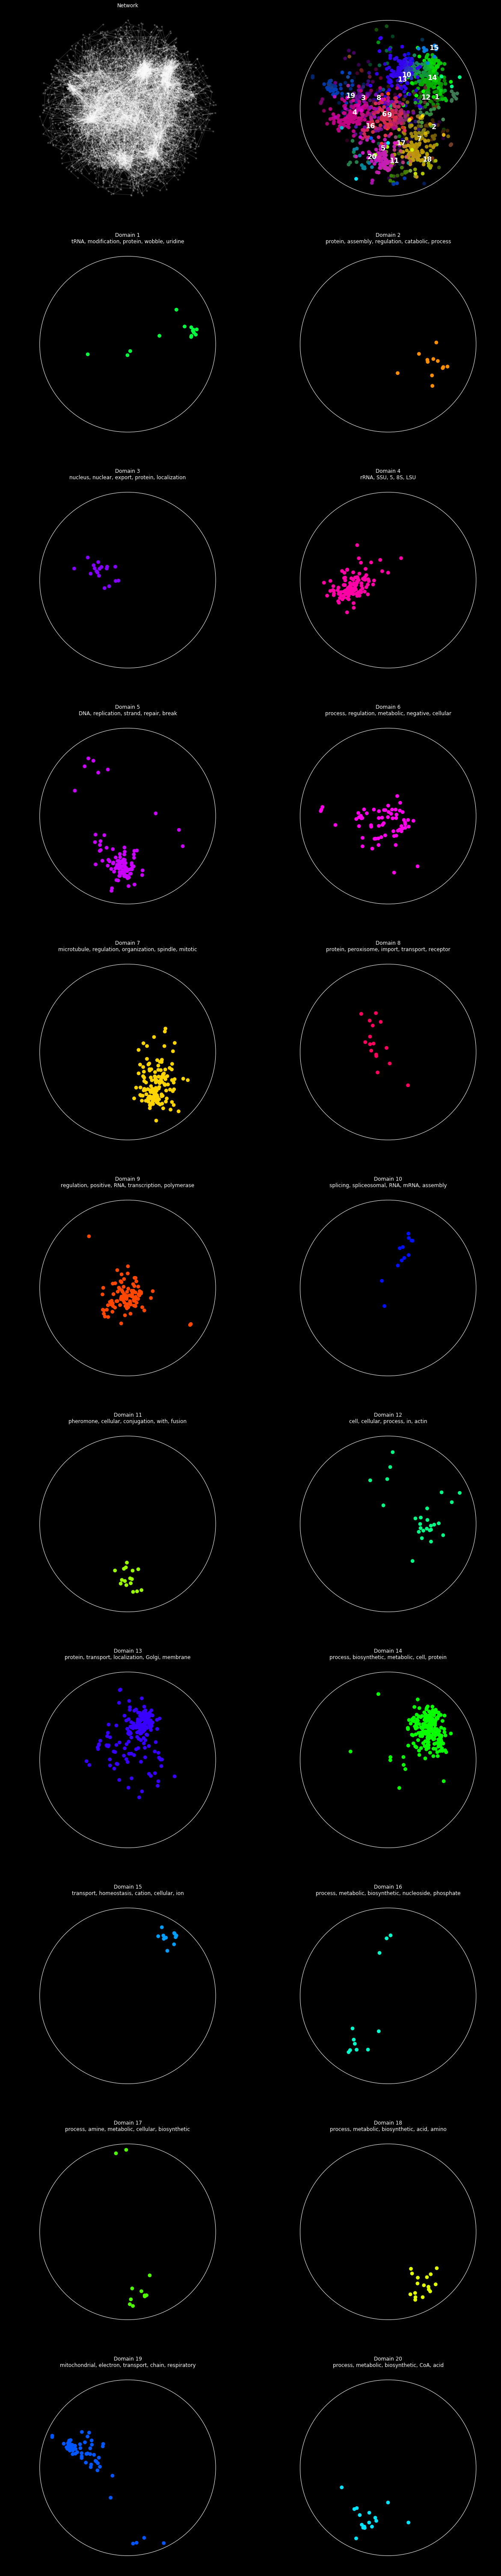

In [18]:
sf.plot_composite_network(show_each_domain=True)

In [ ]:
sf.print_output_files()

In [ ]:
sf.save()